In [1]:
#importing relevant libraries 
import os
import cv2 
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
'''
Reading the file from csv
'''
data = pd.read_csv('output_file1.csv')

In [3]:
data.head()

,FileName,Pixel,Label
0,zero_1.jpg,173 190 209 219 212 192 159 141 137 141 112 10...,0
1,zero_10.jpg,99 94 98 94 94 57 67 88 101 104 103 97 88 97 1...,0
2,zero_100.jpg,98 100 102 108 120 128 135 140 145 148 148 153...,0
3,zero_1000.jpg,220 251 254 254 252 254 251 252 243 209 240 25...,0
4,zero_1001.jpg,141 137 137 140 142 145 146 149 153 154 155 15...,0


In [4]:
data['Pixel']=data['Pixel'].apply(lambda x:  np.array(x.split(), dtype="float32"))

In [5]:
data.head()

,FileName,Pixel,Label
0,zero_1.jpg,"[173.0, 190.0, 209.0, 219.0, 212.0, 192.0, 159...",0
1,zero_10.jpg,"[99.0, 94.0, 98.0, 94.0, 94.0, 57.0, 67.0, 88....",0
2,zero_100.jpg,"[98.0, 100.0, 102.0, 108.0, 120.0, 128.0, 135....",0
3,zero_1000.jpg,"[220.0, 251.0, 254.0, 254.0, 252.0, 254.0, 251...",0
4,zero_1001.jpg,"[141.0, 137.0, 137.0, 140.0, 142.0, 145.0, 146...",0


In [6]:
a =data.iloc[1500,1]
b= a.reshape(64, 64)

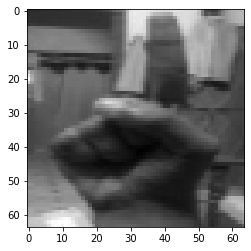

In [7]:
plt.imshow(b, cmap = 'gray')

In [8]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [9]:
def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same')(input_tensor)
   # x = Dropout(0.1)(x)
    x= Activation('relu')(x)

    return x

In [10]:
from keras import layers
from keras import models


In [11]:
def model(input_shape):
  inputs = Input((input_shape))
  
  conv_1= Convolution(inputs,32)
  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
  conv_2 = Convolution(maxp_1,64)
  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
  conv_3 = Convolution(maxp_2,64)
  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
  #conv_4 = Convolution(maxp_3,256)
  #maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
  #drop_4=Dropout(0.5)(maxp_4)
  flatten= Flatten() (maxp_3)
  dense_1= Dense(128,activation='relu')(flatten)
  #drop_4=Dropout(0.5)(bnorm_4)
  hand = Dense(11,activation="softmax",name='hand')(dense_1)
   
  model = Model(inputs=inputs, outputs = hand)

  model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [12]:
X = np.array(data['Pixel'].tolist())
X = X.reshape(X.shape[0],64,64,1)

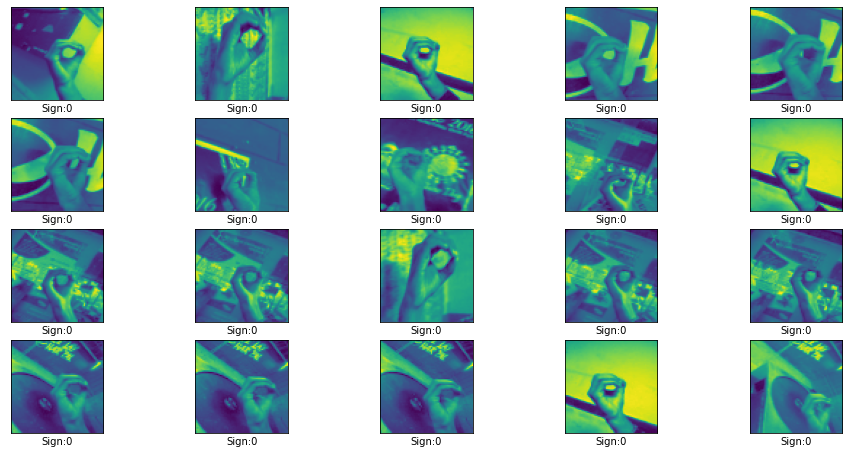

In [13]:
plt.figure(figsize=(16,16))
for i in range(1000,1020):
    plt.subplot(8,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data['Pixel'].iloc[i].reshape(64,64))
    plt.xlabel("Sign:"+str(data['Label'].iloc[i]))
    
plt.show()

In [14]:
X.shape

(16500, 64, 64, 1)

In [15]:
from keras.utils import to_categorical
labels_f=to_categorical(np.array(data['Label'], dtype=int))

In [16]:
labels_f

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, labels_f,test_size=0.30, random_state=40)

In [18]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(11550, 64, 64, 1)
(11550, 11)
(4950, 64, 64, 1)
(4950, 11)


In [19]:
Y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
Model=model((64,64,1))

In [21]:
Model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)       

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [23]:
fle_s='hand_ges.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

In [24]:
History=Model.fit(X_train,Y_train,batch_size=64,validation_data=(X_test,Y_test),epochs=500,callbacks=[callback_list])

Epoch 1/500
181/181 [==============================] - ETA: 0s - loss: 3.0241 - accuracy: 0.3103
Epoch 00001: val_loss improved from inf to 1.64506, saving model to hand_ges.h5
181/181 [==============================] - 86s 477ms/step - loss: 3.0241 - accuracy: 0.3103 - val_loss: 1.6451 - val_accuracy: 0.4846
Epoch 2/500
181/181 [==============================] - ETA: 0s - loss: 0.9591 - accuracy: 0.6898
Epoch 00002: val_loss improved from 1.64506 to 0.78436, saving model to hand_ges.h5
181/181 [==============================] - 86s 477ms/step - loss: 0.9591 - accuracy: 0.6898 - val_loss: 0.7844 - val_accuracy: 0.7578
Epoch 3/500
181/181 [==============================] - ETA: 0s - loss: 0.4559 - accuracy: 0.8539
Epoch 00003: val_loss did not improve from 0.78436
181/181 [==============================] - 95s 524ms/step - loss: 0.4559 - accuracy: 0.8539 - val_loss: 1.2642 - val_accuracy: 0.6703
Epoch 4/500
181/181 [==============================] - ETA: 0s - loss: 0.2656 - accuracy: 0.

In [25]:
Model.evaluate(X_test,Y_test)

155/155 [==============================] - 6s 41ms/step - loss: 0.4576 - accuracy: 0.9158


[0.4575502574443817, 0.9157575964927673]

In [26]:
pred=Model.predict(X_test)
print(pred)

[[3.36477265e-13 1.51843412e-20 2.94728630e-18 ... 5.16705602e-11
  5.71359258e-13 7.54473634e-16]
 [3.85735319e-07 1.62711289e-10 8.90135008e-04 ... 6.71036780e-15
  9.37241007e-14 1.14662955e-08]
 [6.34132275e-15 2.02243399e-33 1.28846987e-23 ... 3.62191662e-20
  1.23432718e-28 5.13433292e-07]
 ...
 [1.18459722e-08 3.74965057e-23 4.68393988e-23 ... 1.97952559e-23
  1.85894022e-15 1.00000000e+00]
 [1.64419248e-07 1.52405566e-09 5.35485068e-13 ... 9.99832630e-01
  5.06566700e-09 4.11456007e-08]
 [2.48733766e-16 2.14691279e-15 3.43281740e-12 ... 1.74060677e-08
  3.17978387e-11 4.94926107e-18]]


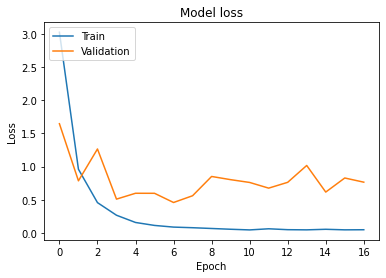

In [27]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

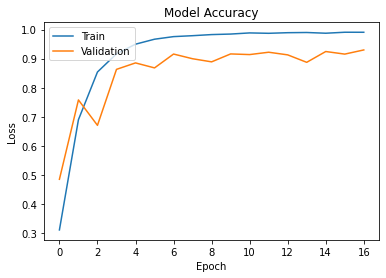

In [34]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [35]:
i=0
Pred_l=[]
while(i<len(pred[0])):
  Pred_l.append(int(np.round(pred[0][i])))
  i+=1

In [36]:
def validate(ind,Model):
  plt.imshow(data['Pixel'].iloc[ind].reshape(64,64))
  test = np.array(data['Pixel'].iloc[ind])
  test = test.reshape(64,64)
  pred_1=Model.predict(np.array([test]))
  print(pred_1)
      
  hand=int(np.round(np.argmax(pred_1[0])))
  print("Predicted Number: "+ str(hand))
  print("Actual Number: "+ str(np.array(data['Label'].iloc[ind])))

[[1.0000000e+00 3.3253105e-11 5.1773229e-13 7.9185858e-10 1.0796624e-08
  5.0525578e-10 5.7621487e-11 8.4686026e-12 7.3847033e-11 1.0396660e-13
  2.6054827e-09]]
Predicted Number: 0
Actual Number: 0


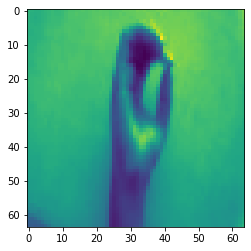

In [30]:
validate(100,Model)

[[4.6701118e-14 6.5376207e-07 9.9997997e-01 5.6071099e-07 6.1714213e-13
  7.8055997e-18 1.8799801e-05 3.6745352e-08 8.9408182e-15 2.8399579e-20
  1.2593314e-10]]
Predicted Number: 2
Actual Number: 2


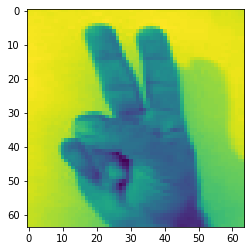

In [31]:
validate(3000,Model)

[[6.5661740e-15 1.6560983e-20 6.3979800e-14 9.5013803e-17 6.2968755e-15
  2.4059869e-15 1.2520383e-16 7.9871197e-17 5.9329852e-18 2.4883517e-16
  1.0000000e+00]]
Predicted Number: 10
Actual Number: 10


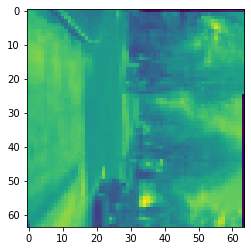

In [37]:
validate(15020,Model)

[[1.9053113e-08 5.6975275e-11 5.1835241e-07 2.8864404e-06 1.4578343e-04
  8.7399185e-06 9.8438001e-01 1.5462069e-02 2.2233726e-10 2.6462291e-10
  4.9351153e-12]]
Predicted Number: 6
Actual Number: 6


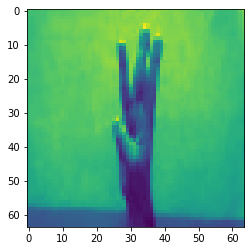

In [33]:
validate(10000,Model)